---
# **Projek Pertama - Klasifikasi Penyakit Diabetes**


---
Author : `David Mario Yohanes Samosir`


<h1> <b> Domain Proyek </b> </h1>
<hr>
<h3> Latar Belakang </h3>

Diabetes merupakan salah satu penyakit kronis yang paling umum di dunia, yang terjadi ketika tubuh tidak dapat secara efektif mengatur kadar gula darah. Deteksi dini dan pengelolaan yang tepat sangat penting untuk mencegah komplikasi serius. Dalam konteks ini, proyek klasifikasi diabetes dengan menggunakan data kesehatan pasien dapat memberikan wawasan berharga dan membantu dalam pengambilan keputusan medis yang lebih baik.

**Mengapa dan Bagaimana Masalah Harus Diselesaikan?** :
- **Meningkatkan Kesehatan Masyarakat**: Dengan deteksi dini, pasien dapat menerima perawatan lebih awal, mengurangi risiko komplikasi.
- **Mengurangi Biaya Perawatan Kesehatan**: Mengelola diabetes lebih awal dapat mengurangi biaya jangka panjang yang terkait dengan komplikasi.
- **Mendukung Penelitian Medis**: Data yang dihasilkan dapat digunakan untuk penelitian lebih lanjut dalam memahami faktor risiko dan pengelolaan diabetes.

<h3> Referensi </h3>

- "Diabetes: A Global Epidemic and Its Impact" - World Health Organization

- Apriyani, H., & Kurniati, K. (2020). Perbandingan Metode Naïve Bayes Dan Support Vector Machine Dalam Klasifikasi Penyakit Diabetes Melitus. Journal of Information Technology Ampera, 1(3), 133–143. https://doi.org/10.51519/journalita.volume1.isssue3.year2020.page133-143

<h1> <b> Business Understanding </b> </h1>
<hr>
<h3> <b> Problem Statements </b> </h3>

1. Bagaimana kita dapat membangun model yang akurat untuk memprediksi apakah seorang pasien menderita diabetes berdasarkan fitur-fitur medis yang tersedia?
2. Fitur mana yang paling berpengaruh dalam menentukan diagnosis diabetes?
3. Bagaimana cara mengoptimalkan model untuk meningkatkan akurasi dan efektivitas prediksi?

<h3> <b> Goals </b> </h3>

1. Mengembangkan model machine learning yang mampu memprediksi dengan akurasi tinggi apakah seorang pasien memiliki diabetes.
2. Mengidentifikasi dan mengurutkan fitur-fitur yang memiliki dampak terbesar terhadap prediksi diabetes.
3. Melakukan tuning hyperparameter dan menggunakan teknik validasi untuk meningkatkan performa model.

<h3> <b> Solution Statements </b> </h3>

1. Membangun beberapa model klasifikasi seperti Logistic Regression, Decision Tree, dan Random Forest, lalu membandingkan performanya.
2. Menggunakan teknik feature importance untuk mengidentifikasi fitur-fitur yang paling berpengaruh.
3. Melakukan hyperparameter tuning menggunakan grid search atau random search untuk mengoptimalkan model terbaik.

<h1> <b> Data Understanding </b> </h1>
<hr>
<h3> <b> Informasi Mengenai Data </b> <h3>

Dataset yang digunakan dalam proyek ini adalah dataset diabetes yang terdiri dari 2000 entri pasien dengan 9 atribut. Atribut-atribut ini mencakup informasi seperti jumlah kehamilan, tingkat glukosa darah, tekanan darah, ketebalan kulit, kadar insulin, BMI (Body Mass Index), fungsi keturunan diabetes, usia, dan hasil akhir yang menunjukkan keberadaan diabetes (Outcome).

<h3> <b> Sumber Data </b> <h3>

Dataset ini diperoleh dari Kaggle [Diabetes](https://www.kaggle.com/datasets/sitirahmahbasri/data-penyakit-diabetes/code)

<h3> <b> Variabel-Variabel dalam Dataset </b> <h3>

Berikut adalah daftar variabel-variabel yang terdapat dalam dataset diabetes:

1. Pregnancies: Jumlah kehamilan yang pernah dialami oleh pasien.
2. Glucose: Kadar glukosa darah 2 jam saat tes toleransi glukosa.
3. BloodPressure: Tekanan darah diastolik (mm Hg).
4. SkinThickness: Ketebalan lipatan kulit trisep (mm).
5. Insulin: 2-Hour serum insulin (mu U/ml).
6. BMI: Indeks massa tubuh (weight in kg/(height in m)^2).
7. DiabetesPedigreeFunction: Fungsi keturunan diabetes.
8. Age: Usia pasien (tahun).
9. Outcome: Hasil akhir (0 untuk tidak menderita diabetes, 1 untuk menderita diabetes).

Instalasi Libraries

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from google.colab import files

Data Wrangling

Gathering Data

In [2]:
# Mengunggah file dari komputer lokal
uploaded = files.upload()

# Contoh: Menyimpan file yang diunggah ke dalam file lokal di Colab
with open('diabetes.csv', 'wb') as f:
    f.write(uploaded['diabetes.csv'])

Saving diabetes.csv to diabetes.csv


In [3]:
# Load Dataset
df = pd.read_csv('./diabetes.csv')

In [4]:
print(df.shape)

(2000, 9)


In [5]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


Assessing Data

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.duplicated().sum()

1256

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [10]:
# Jumlah Data Pregnancies
df.Pregnancies.value_counts()

Pregnancies
1     356
0     301
2     284
3     195
4     191
5     141
6     131
7     100
8      96
9      70
10     54
11     24
12     23
13     22
14      7
17      3
15      2
Name: count, dtype: int64

In [11]:
# Jumlah Data Glucose
df.Glucose.value_counts()

Glucose
99     49
100    44
102    39
129    37
112    36
       ..
67      2
191     2
44      2
62      2
177     2
Name: count, Length: 136, dtype: int64

In [12]:
# Jumlah Data BloodPressure
df.BloodPressure.value_counts()

BloodPressure
74     145
70     144
78     128
68     125
64     120
72     118
80      98
62      94
76      93
60      92
0       90
82      83
88      67
66      65
84      61
90      55
58      54
86      53
50      31
54      31
56      31
52      29
75      20
65      19
94      18
85      14
48      13
92      12
44      11
106      9
100      9
96       8
98       8
110      7
46       6
104      5
108      5
55       4
61       4
30       3
122      3
102      3
114      3
38       3
95       2
24       2
40       2
Name: count, dtype: int64

In [13]:
# Jumlah Data SkinThickness
df.SkinThickness.value_counts()

SkinThickness
0      573
32      83
30      75
23      60
27      58
28      54
18      54
39      52
33      51
31      50
25      47
37      45
22      44
29      44
40      42
19      41
17      41
41      41
26      39
36      38
15      33
35      33
20      32
24      31
42      31
13      30
21      27
46      25
12      21
34      19
38      18
43      15
14      15
16      15
11      14
45      13
10      13
44      12
48      12
49      11
50       7
47       7
8        6
54       4
52       4
56       3
51       3
7        3
63       3
59       2
60       2
99       2
110      2
Name: count, dtype: int64

In [14]:
# Jumlah Data Insulin
df.Insulin.value_counts()

Insulin
0      956
105     31
140     24
180     23
130     22
      ... 
342      2
300      2
177      2
326      1
188      1
Name: count, Length: 182, dtype: int64

In [15]:
# Jumlah Data BMI
df.BMI.value_counts()

BMI
32.0    33
31.2    33
31.6    29
0.0     28
33.3    27
        ..
45.4     2
30.3     2
21.7     2
48.7     2
26.3     1
Name: count, Length: 247, dtype: int64

In [16]:
# Jumlah Data DiabetesPedigreeFunction
df.DiabetesPedigreeFunction.value_counts()

DiabetesPedigreeFunction
0.258    16
0.207    15
0.238    13
0.261    13
0.268    13
         ..
0.677     2
0.296     2
0.320     2
0.493     1
0.107     1
Name: count, Length: 505, dtype: int64

In [17]:
# Jumlah Data Age
df.Age.value_counts()

Age
22    192
21    166
25    134
24    122
23    103
28     98
26     84
27     81
29     70
31     58
30     56
41     51
37     48
42     48
36     46
38     45
33     43
45     42
39     36
40     35
46     35
34     34
43     34
32     31
35     27
50     21
58     21
44     20
52     19
47     17
48     14
49     14
55     14
63     13
51     13
54     12
66     12
62     10
67     10
53     10
65      8
57      7
60      7
56      7
69      6
59      6
61      5
64      3
72      3
81      3
70      3
68      3
Name: count, dtype: int64

In [18]:
# Jumlah Data Outcome
df.Outcome.value_counts()

Outcome
0    1316
1     684
Name: count, dtype: int64

<ipython-input-19-710b73e62124>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column].dropna(), kde=True)


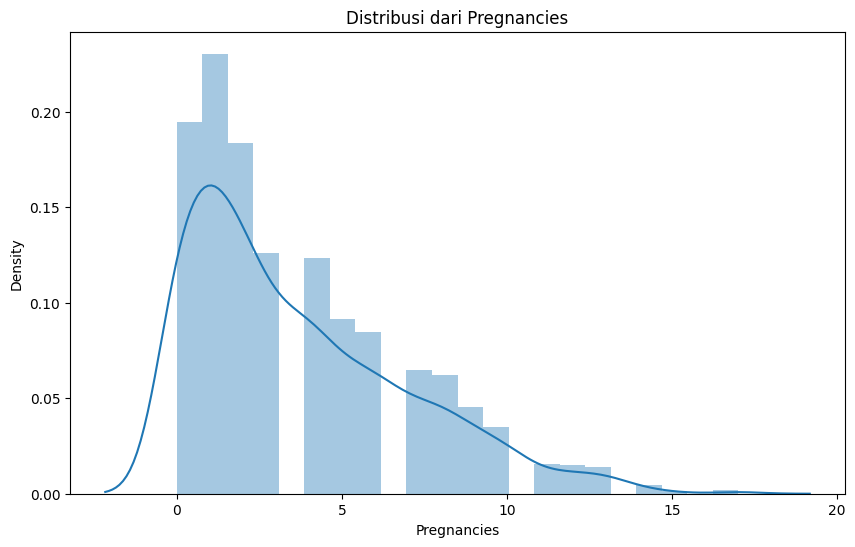

<ipython-input-19-710b73e62124>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column].dropna(), kde=True)


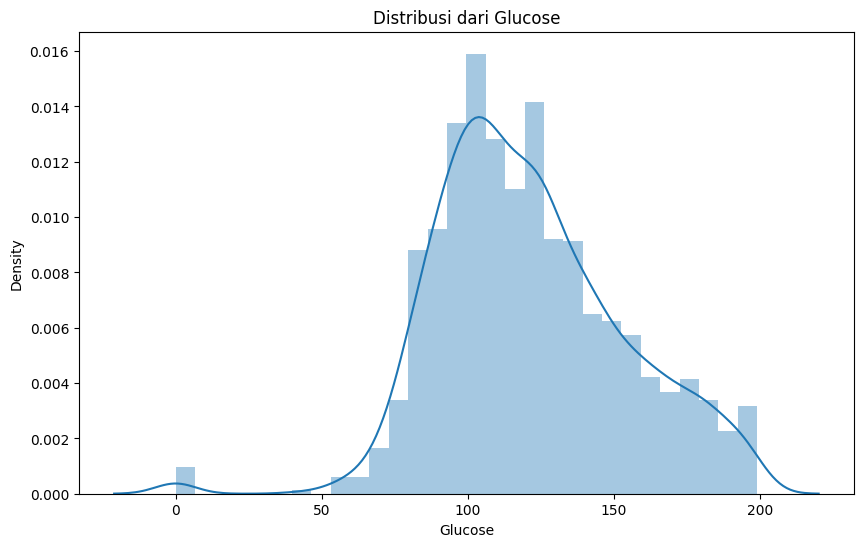

<ipython-input-19-710b73e62124>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column].dropna(), kde=True)


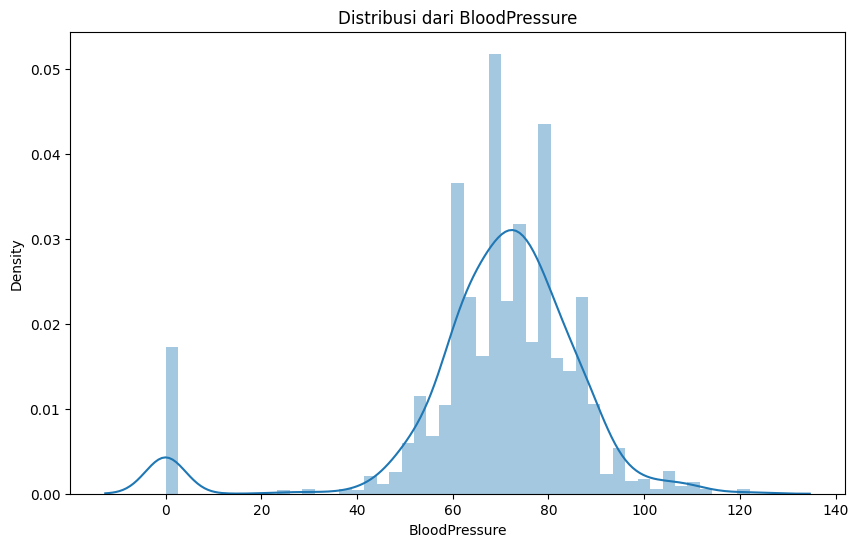

<ipython-input-19-710b73e62124>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column].dropna(), kde=True)


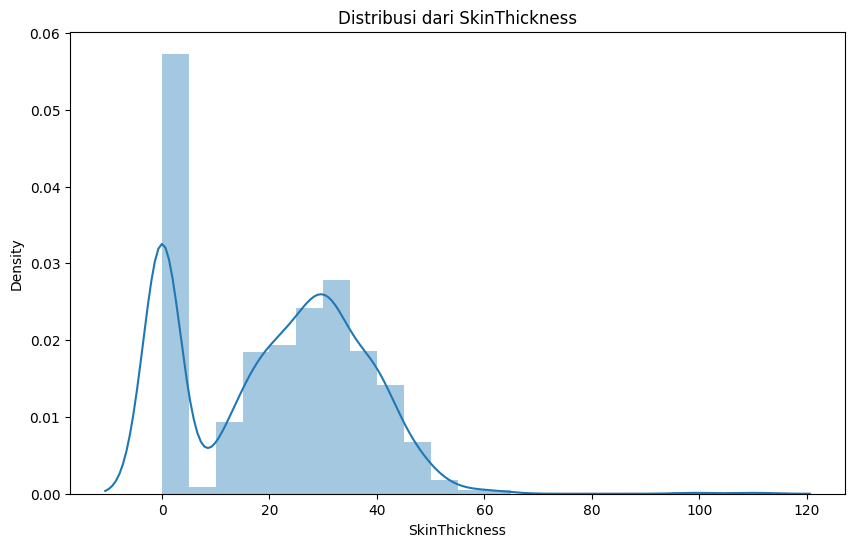

<ipython-input-19-710b73e62124>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column].dropna(), kde=True)


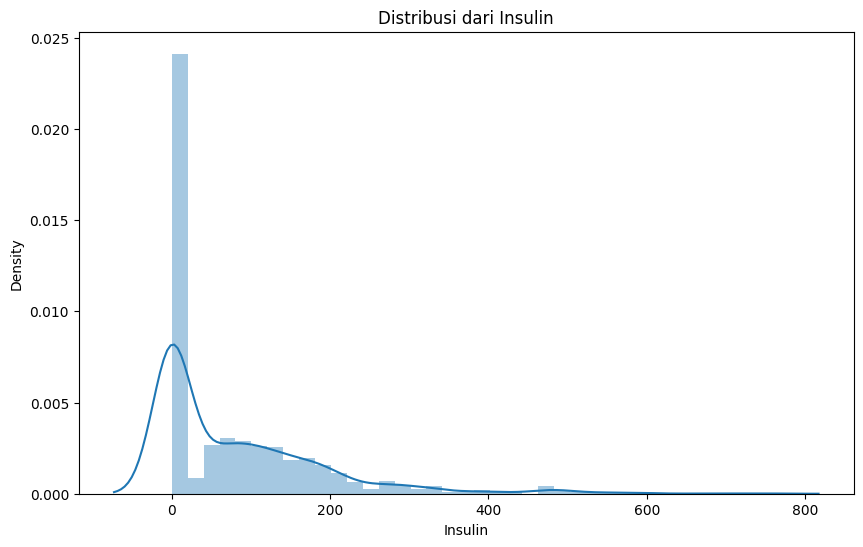

<ipython-input-19-710b73e62124>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column].dropna(), kde=True)


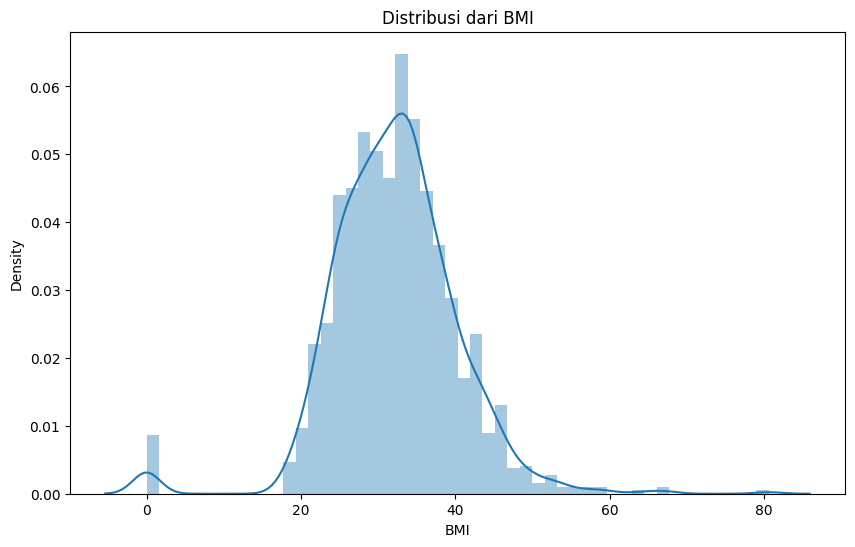

<ipython-input-19-710b73e62124>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column].dropna(), kde=True)


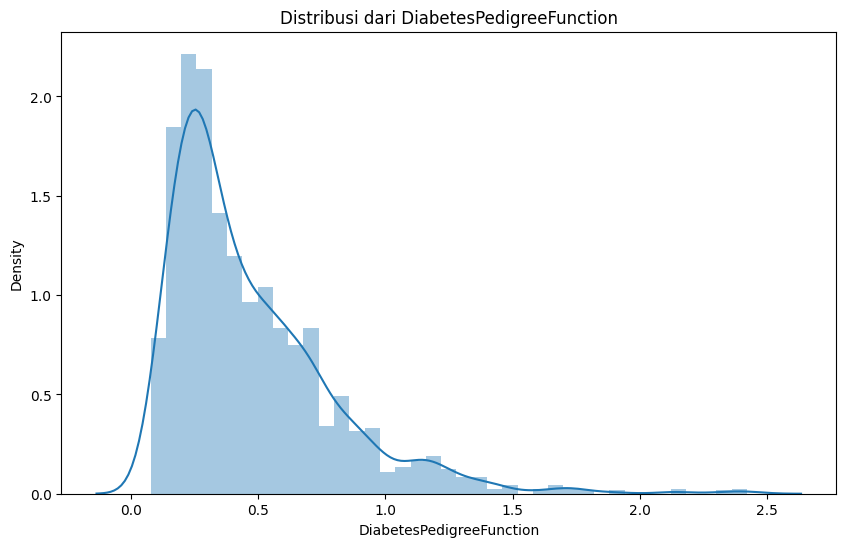

<ipython-input-19-710b73e62124>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column].dropna(), kde=True)


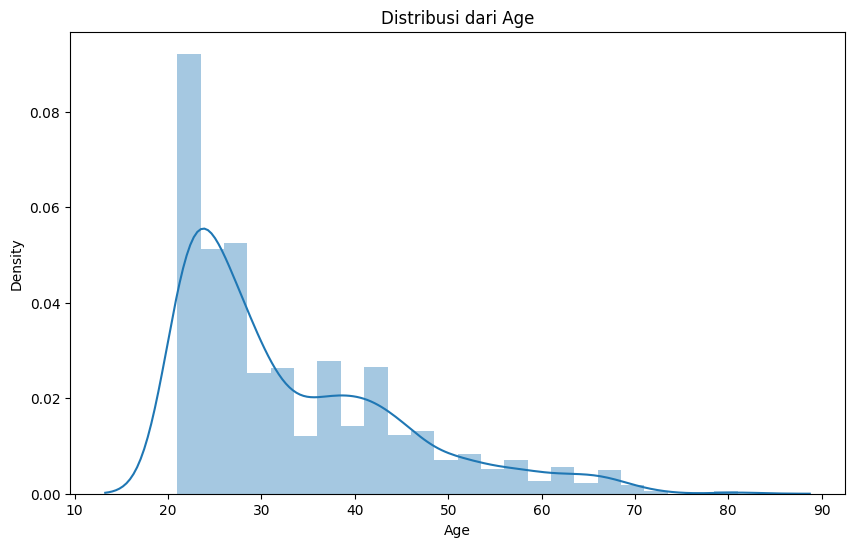

<ipython-input-19-710b73e62124>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column].dropna(), kde=True)


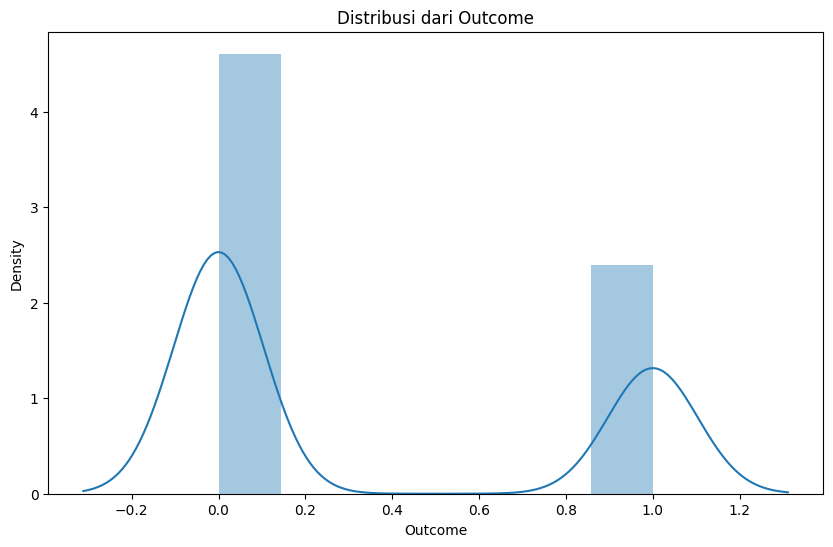

In [19]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 6))
    sns.distplot(df[column].dropna(), kde=True)
    plt.title(f'Distribusi dari {column}')
    plt.show()

Cleaning Data

In [20]:
# Menghapus baris yang duplikat
df.drop_duplicates(inplace=True)
print("Jumlah nilai duplikat:", df.duplicated().sum())

Jumlah nilai duplikat: 0


In [21]:
df.shape

(744, 9)

Exploratory Data Analysis (EDA)

In [22]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1564,1,100,62,0,0,64.4,0.152,36,0
1565,0,163,40,23,64,40.7,0.322,33,0
1566,6,139,84,37,0,50.7,0.320,50,1
1567,2,167,44,30,140,52.7,0.452,28,0


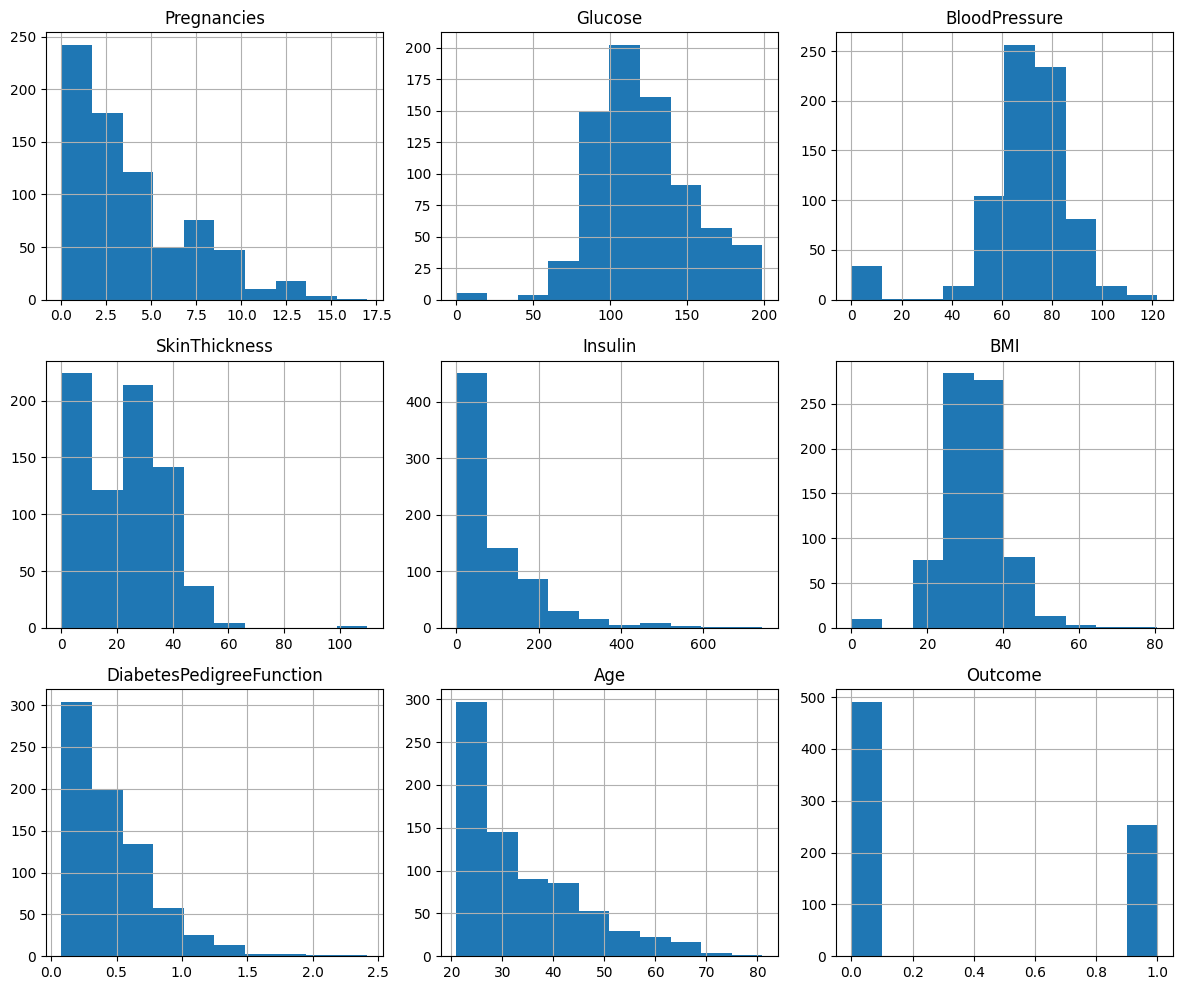

In [23]:
# Histogram untuk melihat distribusi variabel
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

In [24]:
# Korelasi antar variabel
correlation = df.corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.117050,0.144284,-0.062530,-0.055783,0.025621,-0.024800,0.536657,0.220942
Glucose,0.117050,1.000000,0.137616,0.070855,0.325135,0.239693,0.133669,0.248673,0.453939
BloodPressure,0.144284,0.137616,1.000000,0.189010,0.091822,0.272704,0.051479,0.242559,0.078808
SkinThickness,-0.062530,0.070855,0.189010,1.000000,0.436080,0.367853,0.184098,-0.103400,0.075562
Insulin,-0.055783,0.325135,0.091822,0.436080,1.000000,0.205365,0.202825,-0.063747,0.114655
BMI,0.025621,0.239693,0.272704,0.367853,0.205365,1.000000,0.124132,0.053336,0.278123
DiabetesPedigreeFunction,-0.024800,0.133669,0.051479,0.184098,0.202825,0.124132,1.000000,0.033321,0.174688
Age,0.536657,0.248673,0.242559,-0.103400,-0.063747,0.053336,0.033321,1.000000,0.242077
Outcome,0.220942,0.453939,0.078808,0.075562,0.114655,0.278123,0.174688,0.242077,1.000000


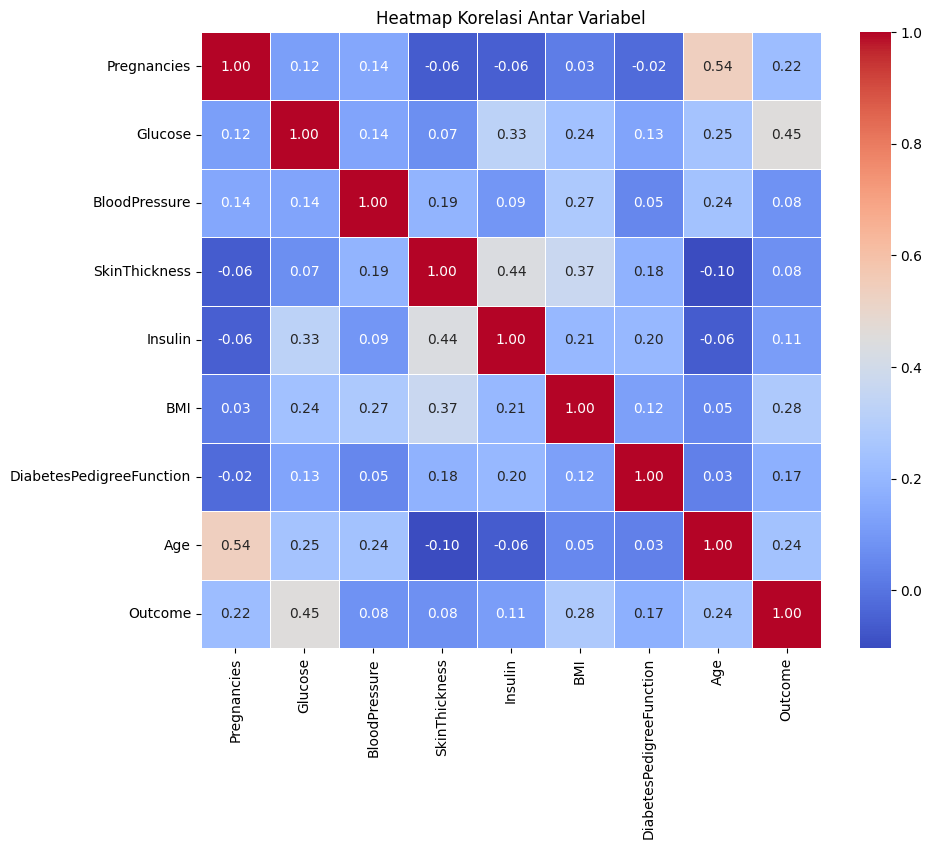

In [25]:
# Heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

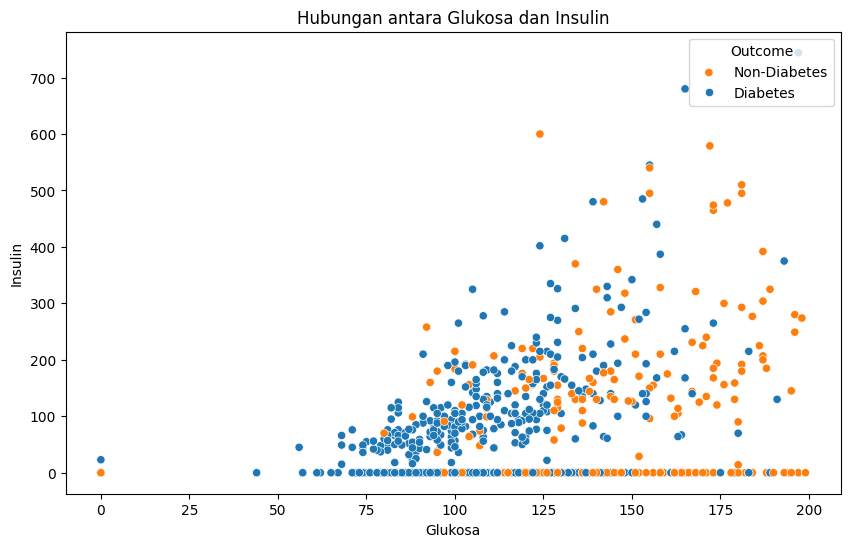

In [26]:
# Scatter plot untuk melihat hubungan dua variabel
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Glucose', y='Insulin', data=df, hue='Outcome')
plt.title('Hubungan antara Glukosa dan Insulin')
plt.xlabel('Glukosa')
plt.ylabel('Insulin')
plt.legend(title='Outcome', loc='upper right', labels=['Non-Diabetes', 'Diabetes'])
plt.show()

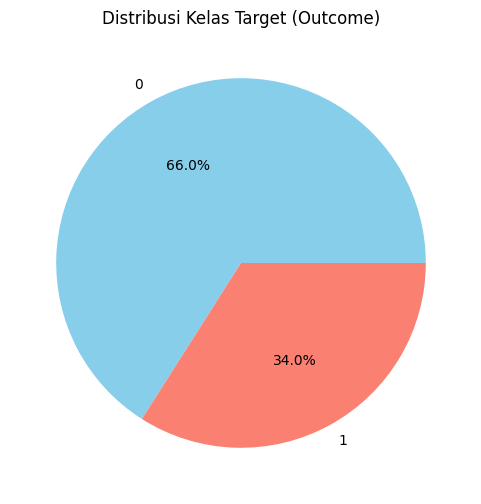

Outcome
0    491
1    253
Name: count, dtype: int64


In [27]:
# Menghitung jumlah sampel untuk setiap kelas target
class_counts = df['Outcome'].value_counts()

# Plot pie chart atau bar plot untuk distribusi kelas target
plt.figure(figsize=(6, 6))
class_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Distribusi Kelas Target (Outcome)')
plt.ylabel('')
plt.show()

# Menampilkan jumlah sampel untuk setiap kelas target
print(class_counts)

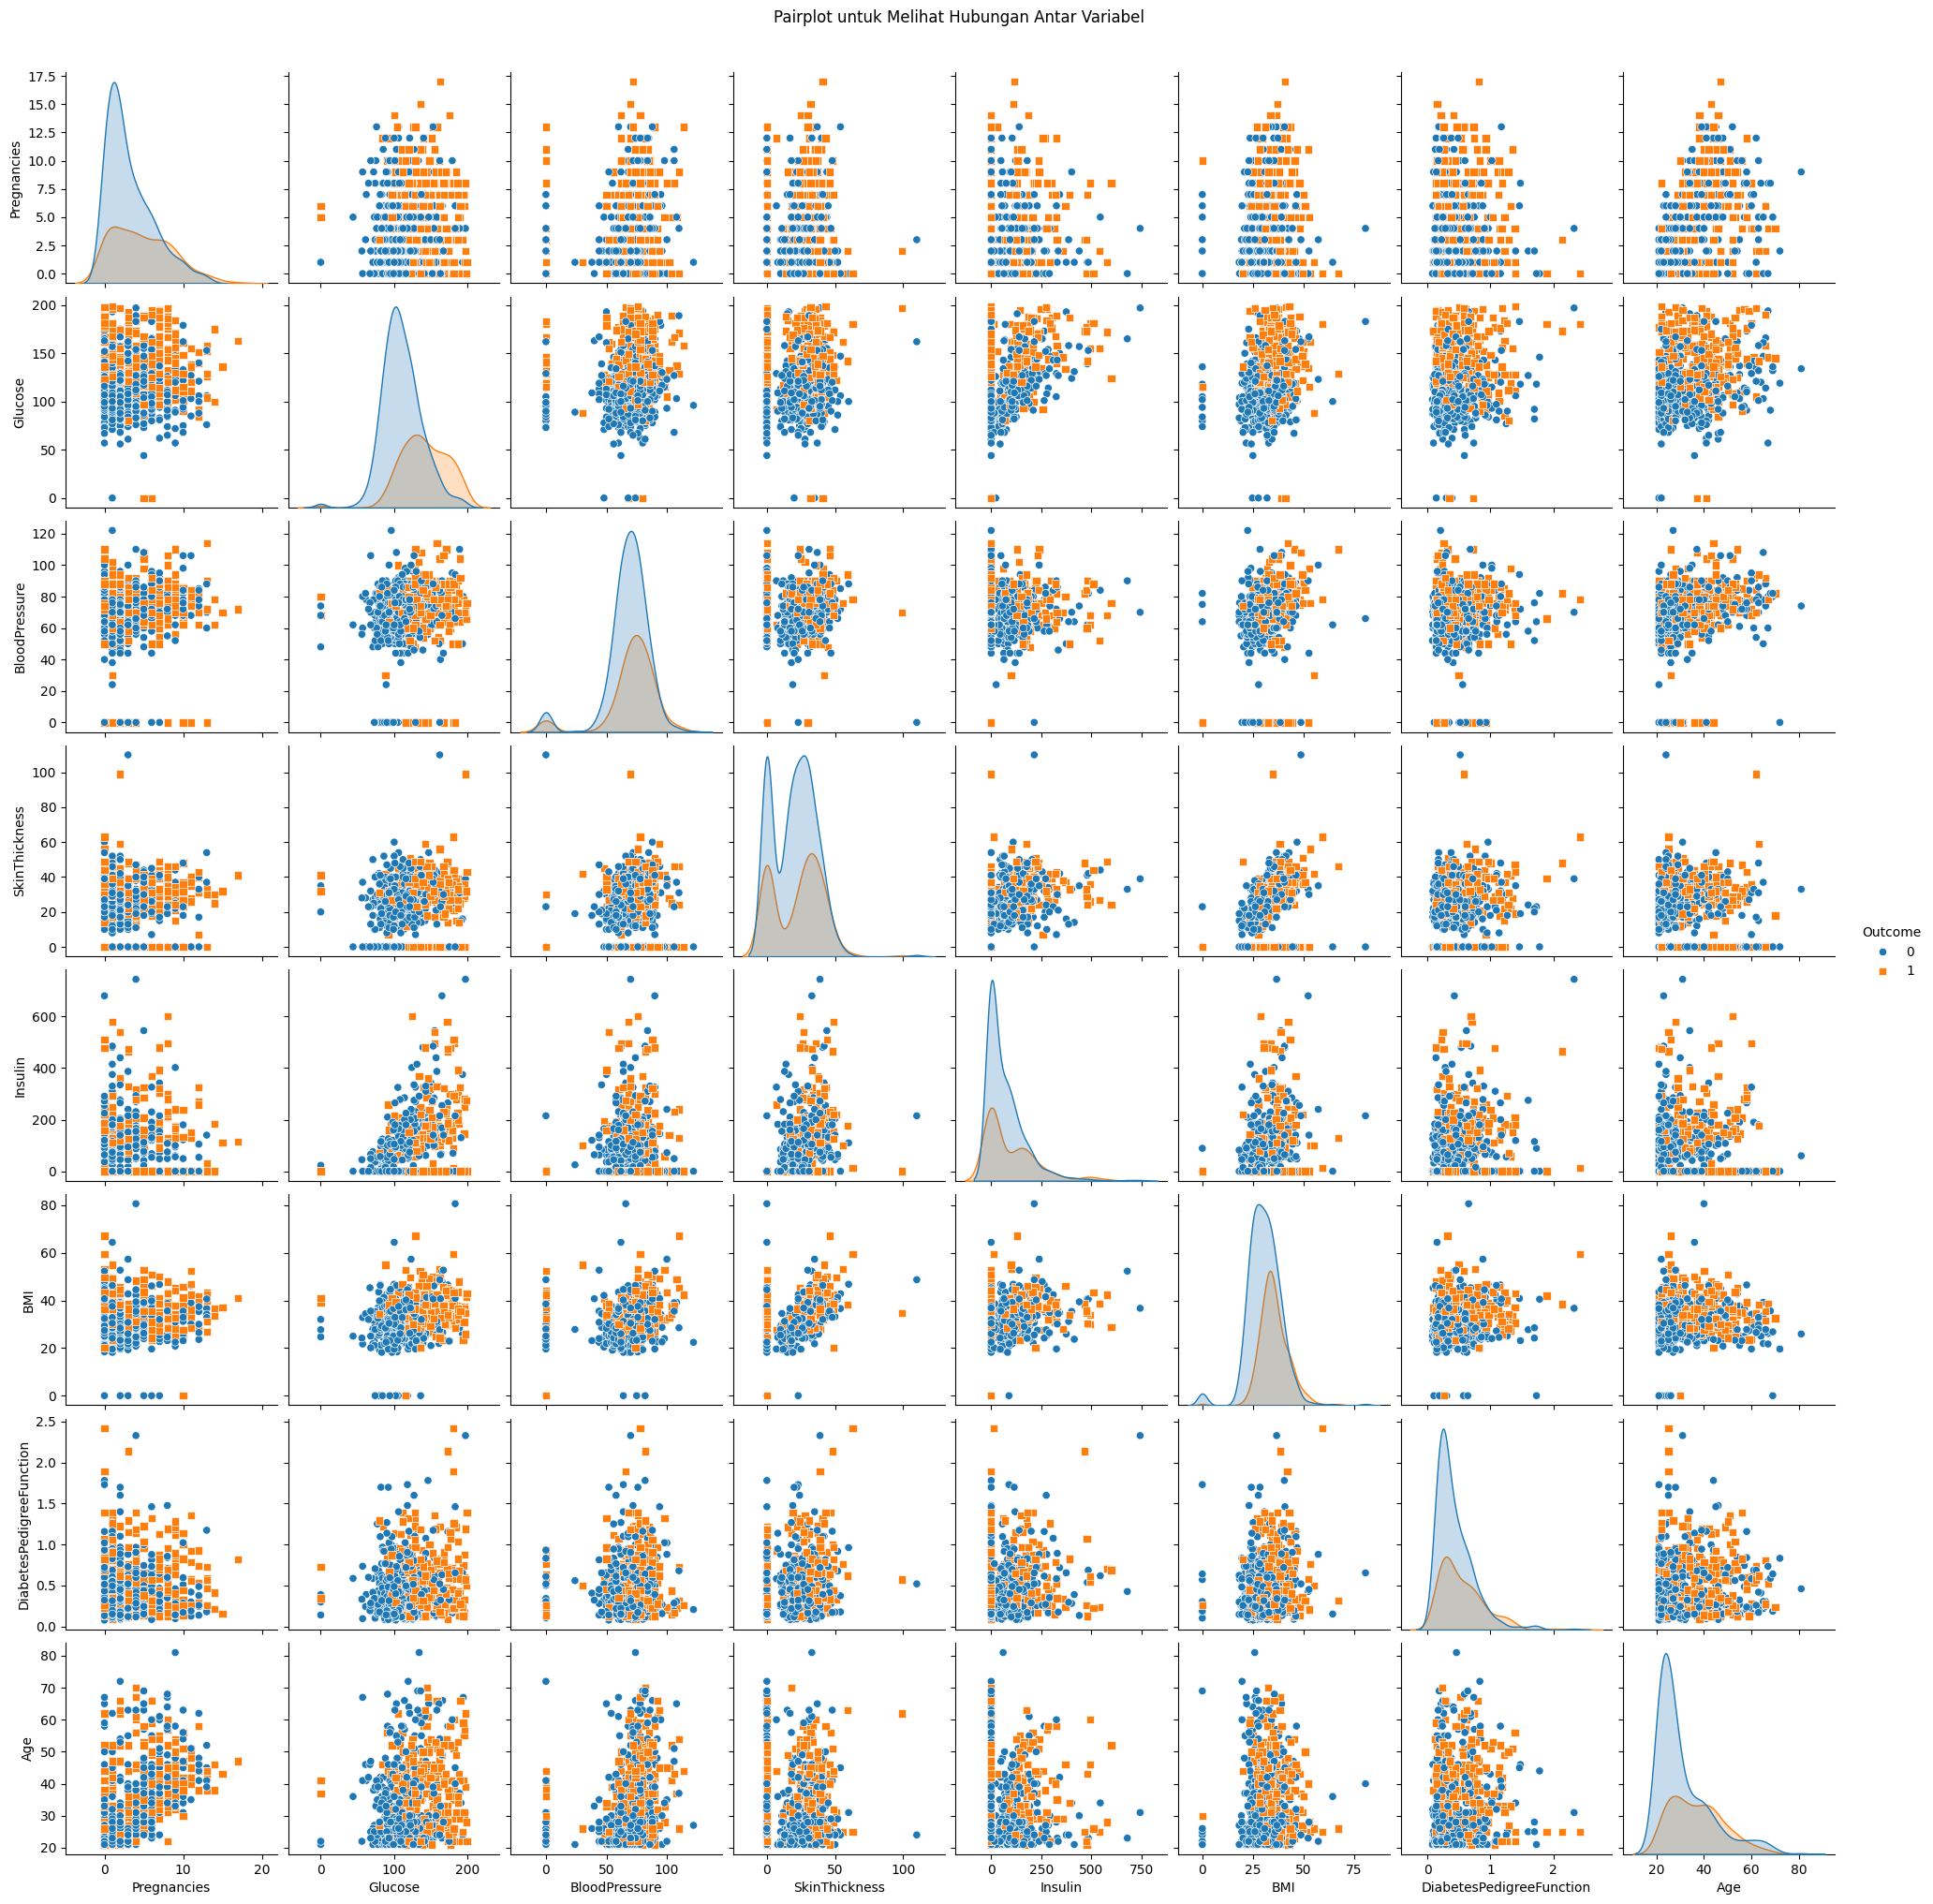

In [28]:
# Pairplot untuk melihat hubungan antar variabel secara keseluruhan
sns.pairplot(df, hue='Outcome', diag_kind='kde', markers=['o', 's'])
plt.suptitle('Pairplot untuk Melihat Hubungan Antar Variabel', y=1.02)
plt.show()

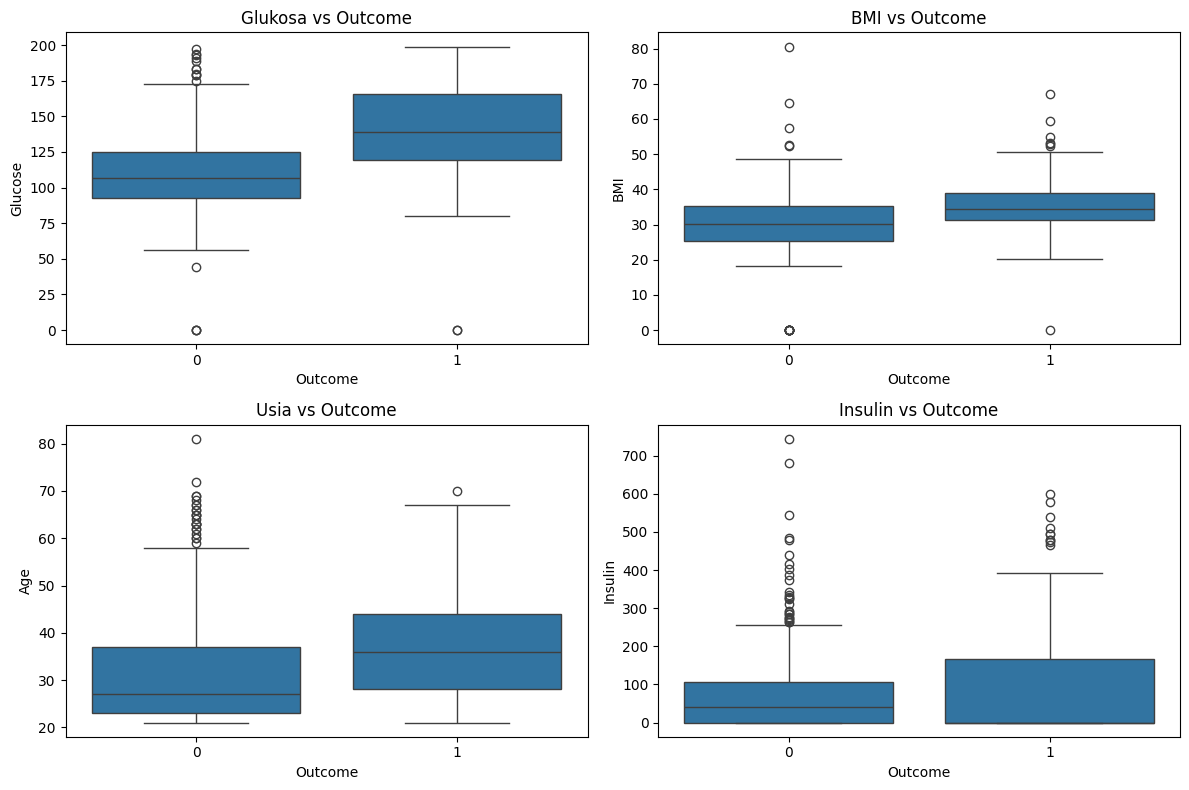

In [29]:
# Boxplot untuk melihat distribusi variabel terhadap Outcome
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Glukosa vs Outcome')

plt.subplot(2, 2, 2)
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.title('BMI vs Outcome')

plt.subplot(2, 2, 3)
sns.boxplot(x='Outcome', y='Age', data=df)
plt.title('Usia vs Outcome')

plt.subplot(2, 2, 4)
sns.boxplot(x='Outcome', y='Insulin', data=df)
plt.title('Insulin vs Outcome')

plt.tight_layout()
plt.show()

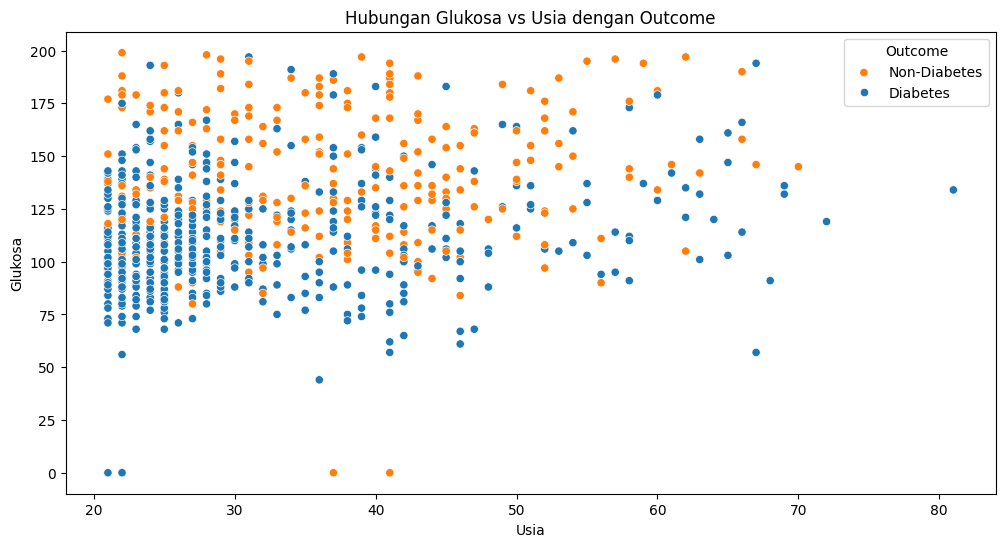

In [30]:
# Scatter plot untuk melihat distribusi variabel utama (misalnya Glukosa, BMI) berdasarkan usia
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='Glucose', hue='Outcome', data=df)
plt.title('Hubungan Glukosa vs Usia dengan Outcome')
plt.xlabel('Usia')
plt.ylabel('Glukosa')
plt.legend(title='Outcome', loc='upper right', labels=['Non-Diabetes', 'Diabetes'])
plt.show()

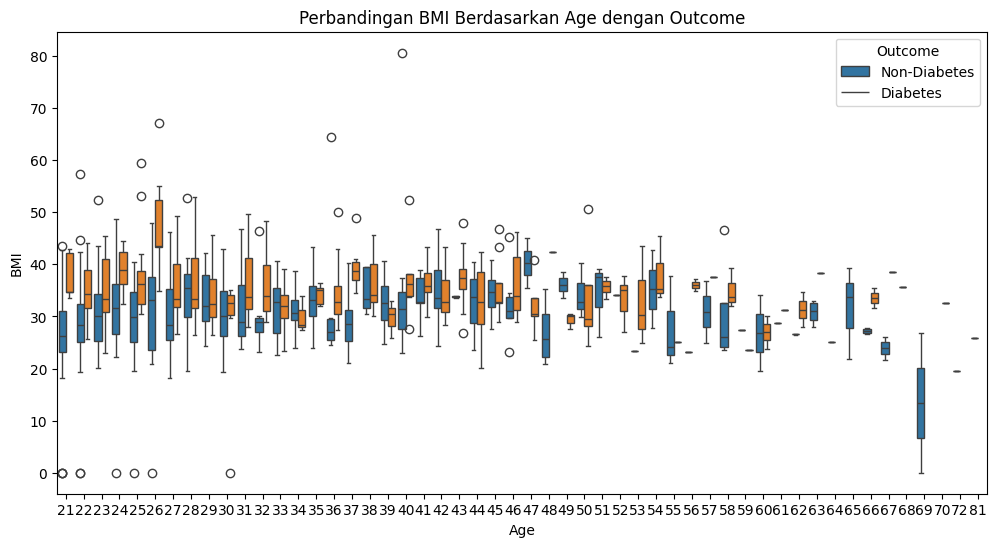

In [31]:
# Misalkan jika dataset memiliki informasi Age
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age', y='BMI', hue='Outcome', data=df)
plt.title('Perbandingan BMI Berdasarkan Age dengan Outcome')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='Outcome', loc='upper right', labels=['Non-Diabetes', 'Diabetes'])
plt.show()

<h1> <b> Data Preparation </b> </h1>
<hr>
- Handling Missing Values: Mengatasi nilai yang hilang dengan mengisi dengan rata-rata atau median dari masing-masing kolom yang relevan. Hal ini penting agar tidak ada nilai yang hilang yang mempengaruhi kinerja model.

- Scaling Features: Melakukan penskalaan fitur menggunakan StandardScaler untuk memastikan semua fitur memiliki skala yang serupa. Ini membantu model Machine Learning untuk bekerja dengan lebih baik.

- Pembagian Dataset: Memisahkan dataset menjadi data latih (X_train, y_train) dan data uji (X_test, y_test) dengan rasio 80:20. Data latih digunakan untuk melatih model, sementara data uji digunakan untuk menguji performa model yang sudah dilatih.

In [32]:
# 1. Handling Missing Values
# Mengganti nilai-nilai yang hilang dengan rata-rata atau median
df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].median(), inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace=True)
df['Insulin'].fillna(df['Insulin'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [33]:
# 2. Scaling Featurs
# Penskalaan fitur menggunakan StandardScaler
scaler = StandardScaler()
cols_to_scale = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [34]:
# 3. Pembagian Dataset
# Memisahkan dataset menjadi fitur (X) dan target (y)
X = df.drop('Outcome', axis=1)  # X berisi semua kolom kecuali 'Outcome'
y = df['Outcome']  # y berisi kolom 'Outcome' yang merupakan target atau label yang ingin diprediksi

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan dimensi data latih dan data uji
print("Dimensi data latih:", X_train.shape)
print("Dimensi data uji:", X_test.shape)

Dimensi data latih: (595, 8)
Dimensi data uji: (149, 8)


<h1> <b> Modeling </b> </h1>
<hr>

<h3> 1. Memilih Model Machine Learning </h3>
Dalam tahap Modeling, kita memilih dan mengimplementasikan model-machine learning untuk menyelesaikan permasalahan klasifikasi diabetes. Model yang dipilih dalam proyek ini meliputi:

- Logistic Regression: Model ini cocok untuk masalah klasifikasi biner dan menggunakan fungsi logistik untuk memprediksi probabilitas keberadaan diabetes berdasarkan fitur-fitur medis yang tersedia.

- Decision Tree: Menggunakan struktur pohon keputusan untuk memisahkan data berdasarkan fitur-fitur, membuat keputusan berdasarkan aturan yang ditemukan dari data.

- Random Forest: Ensemble dari banyak Decision Tree yang bekerja bersama untuk meningkatkan akurasi dan mengurangi overfitting.

<h3> 2. Parameter yang Digunakan </h3>
Setiap model memiliki parameter yang dapat diatur untuk meningkatkan performa dan generalisasi:

- Logistic Regression: Parameter yang dapat diatur misalnya adalah regularisasi (C) untuk mengontrol kompleksitas model.

- Decision Tree: Parameter seperti kedalaman maksimum pohon (max_depth), jumlah minimum sampel di leaf node (min_samples_leaf), dan kriteria pemisahan (criterion) dapat diatur untuk mengoptimalkan pembangunan pohon.

- Random Forest: Selain parameter dari Decision Tree, Random Forest juga mempertimbangkan jumlah pohon (n_estimators) dan jumlah fitur yang dipertimbangkan dalam setiap split (max_features).

<h3> 3. Kelebihan dan Kekurangan Setiap Algoritma </h3>

1. Logistic Regression:

  - Kelebihan: Sederhana, mudah diinterpretasikan, cocok untuk dataset linier.
  - Kekurangan: Tidak dapat menangani hubungan non-linier secara langsung.

2. Decision Tree:

  - Kelebihan: Mudah diinterpretasikan, mampu menangani hubungan non-linier dan interaksi antar variabel.
  - Kekurangan: Rentan terhadap overfitting jika tidak diatur dengan baik, tidak stabil terhadap perubahan kecil dalam data.

3. Random Forest:

  - Kelebihan: Mengurangi overfitting dibandingkan dengan Decision Tree tunggal, bisa digunakan untuk dataset besar dengan banyak fitur.
  - Kekurangan: Lebih sulit untuk diinterpretasikan dibandingkan Decision Tree tunggal, membutuhkan waktu lebih lama untuk melatih karena ensemble dari banyak pohon.

In [37]:
# 1. Logistic Regression

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid
param_grid_logreg = {'C': [0.01, 0.1, 1, 10, 100]}

# Inisialisasi GridSearchCV untuk Logistic Regression
logreg_grid = GridSearchCV(LogisticRegression(random_state=42), param_grid_logreg, cv=5, scoring='accuracy', n_jobs=-1)

# Melatih model dengan hyperparameter tuning
logreg_grid.fit(X_train, y_train)

# Model terbaik setelah tuning
best_logreg_model = logreg_grid.best_estimator_

# Menampilkan parameter terbaik
print("Parameter terbaik untuk Logistic Regression:", logreg_grid.best_params_)


Parameter terbaik untuk Logistic Regression: {'C': 1}


In [39]:
# 2. Decision Tree

from sklearn.tree import DecisionTreeClassifier

# Define parameter grid
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi GridSearchCV untuk Decision Tree
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)

# Melatih model dengan hyperparameter tuning
dt_grid.fit(X_train, y_train)

# Model terbaik setelah tuning
best_dt_model = dt_grid.best_estimator_

# Menampilkan parameter terbaik
print("Parameter terbaik untuk Decision Tree:", dt_grid.best_params_)


Parameter terbaik untuk Decision Tree: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [41]:
# 3. Random Forest

from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt']
}

# Inisialisasi GridSearchCV untuk Random Forest
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Melatih model dengan hyperparameter tuning
rf_grid.fit(X_train, y_train)

# Model terbaik setelah tuning
best_rf_model = rf_grid.best_estimator_

# Menampilkan parameter terbaik
print("Parameter terbaik untuk Random Forest:", rf_grid.best_params_)


Parameter terbaik untuk Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}


Dari hasil hyperparameter tuning yang didapatkan:

1. Logistic Regression: Parameter terbaik adalah C=1.
2. Decision Tree: Parameter terbaik adalah `max_depth=None`, `min_samples_leaf=4`, dan `min_samples_split=10`.
3. Random Forest: Parameter terbaik adalah `'max_depth': None`, `'max_features': 'sqrt'`, `'min_samples_leaf': 2`, `'min_samples_split': 10`, `'n_estimators': 50`

Berdasarkan hasil parameter terbaik, memilih Random Forest sebagai model terbaik bisa menjadi pilihan yang baik. Alasannya adalah:
- Performa yang baik: Random Forest umumnya memberikan performa yang solid dan stabil karena menggabungkan beberapa pohon keputusan untuk mengurangi variansinya.

- Mengatasi overfitting: Dengan menggunakan teknik averaging dari beberapa pohon, Random Forest cenderung lebih tahan terhadap overfitting dibandingkan dengan Decision Tree tunggal.

- Fleksibilitas dalam parameter: Random Forest memberikan fleksibilitas dalam menentukan jumlah pohon (n_estimators) dan bagaimana fitur dipilih (max_features), meskipun ada peringatan untuk mengubah max_features menjadi 'sqrt' dari 'auto' untuk menghindari peringatan masa depan.

<h1> <b> Evaluation </b> </h1>
<hr>
Dalam konteks klasifikasi untuk proyek ini, kita akan menggunakan beberapa metrik evaluasi yang umum digunakan:

1. Accuracy (Akurasi): Persentase dari prediksi yang benar secara keseluruhan.

  $Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$.

  - TP: True Positives (prediksi benar positif)
  - TN: True Negatives (prediksi benar negatif)
  - FP: False Positives (prediksi salah positif)
  - FN: False Negatives (prediksi salah negatif)

2. Precision: Persentase dari prediksi positif yang benar.
  
  $Precision = \frac{TP}{TP + FP} $

3. Recall (Sensitivity atau True Positive Rate): Persentase dari kasus positif yang berhasil diprediksi.
  
  $Recall = \frac{TP}{TP + FN} $

4. F1 Score: Harmonic mean dari Precision dan Recall, memberikan keseimbangan antara kedua metrik ini.

  $ \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
# Fungsi untuk menampilkan hasil evaluasi
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)

    print(f"{model_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:")
    print(matrix)
    print()

In [46]:
# Evaluasi model Logistic Regression
evaluate_model(best_logreg_model, X_test, y_test, "Logistic Regression")

Logistic Regression:
Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       103
           1       0.64      0.65      0.65        46

    accuracy                           0.78       149
   macro avg       0.74      0.74      0.74       149
weighted avg       0.78      0.78      0.78       149

Confusion Matrix:
[[86 17]
 [16 30]]



In [42]:
y_pred_logreg = best_logreg_model.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

print("Evaluation Metrics for Logistic Regression:")
print(f"Accuracy: {accuracy_logreg:.2f}")
print(f"Precision: {precision_logreg:.2f}")
print(f"Recall: {recall_logreg:.2f}")
print(f"F1 Score: {f1_logreg:.2f}")
print()

Evaluation Metrics for Logistic Regression:
Accuracy: 0.78
Precision: 0.64
Recall: 0.65
F1 Score: 0.65



In [47]:
# Evaluasi model Decision Tree
evaluate_model(best_dt_model, X_test, y_test, "Decision Tree")

Decision Tree:
Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       103
           1       0.62      0.52      0.56        46

    accuracy                           0.75       149
   macro avg       0.71      0.69      0.70       149
weighted avg       0.74      0.75      0.75       149

Confusion Matrix:
[[88 15]
 [22 24]]



In [43]:
y_pred_dt = best_dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print("Evaluation Metrics for Decision Tree:")
print(f"Accuracy: {accuracy_dt:.2f}")
print(f"Precision: {precision_dt:.2f}")
print(f"Recall: {recall_dt:.2f}")
print(f"F1 Score: {f1_dt:.2f}")
print()

Evaluation Metrics for Decision Tree:
Accuracy: 0.75
Precision: 0.62
Recall: 0.52
F1 Score: 0.56



In [48]:
# Evaluasi model Random Forest
evaluate_model(best_rf_model, X_test, y_test, "Random Forest")

Random Forest:
Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       103
           1       0.61      0.65      0.63        46

    accuracy                           0.77       149
   macro avg       0.73      0.73      0.73       149
weighted avg       0.77      0.77      0.77       149

Confusion Matrix:
[[84 19]
 [16 30]]



In [44]:
# Evaluasi model Random Forest
y_pred_rf = best_rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Evaluation Metrics for Random Forest:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")

Evaluation Metrics for Random Forest:
Accuracy: 0.77
Precision: 0.61
Recall: 0.65
F1 Score: 0.63


Penjelasan Hasil Proyek Berdasarkan Metrik Evaluasi
*Logistic Regression*: Memberikan akurasi yang baik, tetapi memiliki recall yang lebih rendah dibandingkan *Random Forest*, yang berarti lebih banyak kasus positif yang terlewatkan.

- Decision Tree: Menunjukkan performa yang cukup baik tetapi sedikit lebih rendah dibandingkan Logistic Regression dan Random Forest dalam hal akurasi dan F1 score.

- Random Forest: Memiliki akurasi yang paling tinggi dan F1 score yang lebih baik dibandingkan dua model lainnya. Hal ini menunjukkan bahwa Random Forest mampu memberikan keseimbangan yang baik antara precision dan recall dalam memprediksi keberadaan diabetes.

- Dengan demikian, berdasarkan evaluasi metrik yang digunakan, Random Forest dipilih sebagai model terbaik untuk proyek ini karena memberikan performa yang lebih baik dalam memprediksi keberadaan diabetes berdasarkan fitur-fitur medis yang tersedia.